In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

In [3]:
df = pd.read_csv(r"C:\Users\nitis\Downloads\CustomerChurn.csv")

In [44]:
df.info()

## total_charges are in object so need to change the data type to float 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [14]:
null_values_check = df.isnull().sum()
print(null_values_check)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [18]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [20]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [24]:
## Checking the total percentage of churned and not churned customers

df['Churn'].value_counts()/len(df)*100

Churn
No     73.463013
Yes    26.536987
Name: count, dtype: float64

In [97]:
## Total numbers of churned customers

churn_count = df['Churn'].value_counts()
print(churn_count)

Churn
No     5174
Yes    1869
Name: count, dtype: int64


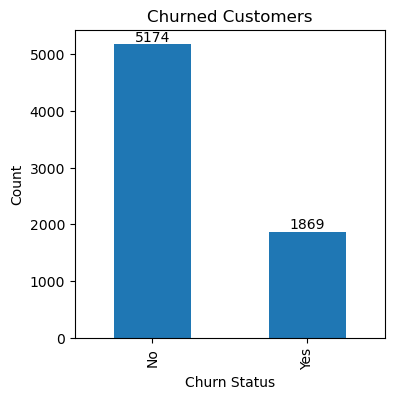

In [98]:
## Graphical representation of the churned and not churned customers

churn_count = df['Churn'].value_counts()
ax= churn_count.plot(kind='bar', figsize=(4,4))
for i, count in enumerate(churn_count):
                plt.text(i, count + 0.1, str(count), ha='center', va='bottom')
plt.title('Churned Customers')
plt.xlabel('Churn Status')
plt.ylabel('Count')

# Show the plot
plt.show()

In [45]:
new_df=df.copy()
new_df.shape

(7043, 21)

In [99]:
## Changing the data types of total charges to numeric

new_df.TotalCharges = pd.to_numeric(new_df.TotalCharges, errors='coerce')
new_df.isnull().sum()

## Here we see that the new data has 11 missing values in the total charges
## we can remove the missing values. if the numbers were huge we would have imputed the mean.

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
tenure_bins         0
dtype: int64

In [100]:
## Dropping any null values in our data set

new_df.dropna(how='any', inplace = True)
new_df.isnull().sum()


gender              0
SeniorCitizen       0
Partner             0
Dependents          0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
tenure_bins         0
dtype: int64

In [54]:
new_df.shape

(7032, 21)

In [55]:
## We can make a bin for tenure 

In [56]:
df['tenure'].min()

0

In [57]:
df['tenure'].max()

72

In [60]:
labels = ['0-12', '12-24', '24-36', '36-48', '48-60', '60-72']
bins = [0,12,24,36,48,60,72]
new_df['tenure_bins'] =pd.cut(new_df.tenure, bins, labels=labels, include_lowest=True)

In [64]:
print(new_df[['tenure', 'tenure_bins']])

      tenure tenure_bins
0          1        0-12
1         34       24-36
2          2        0-12
3         45       36-48
4          2        0-12
...      ...         ...
7038      24       12-24
7039      72       60-72
7040      11        0-12
7041       4        0-12
7042      66       60-72

[7032 rows x 2 columns]


In [65]:
new_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_bins
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0-12
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,24-36
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0-12
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,36-48
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0-12


In [101]:
## Since customer Id and, Tenure has no need in our this next analysis, we will remove these two. (ignore this error)

new_df.drop(columns=['customerID', 'tenure'], axis=1, inplace=True)

KeyError: "['customerID', 'tenure'] not found in axis"

In [103]:
new_df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_bins
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0-12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,24-36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0-12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,36-48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0-12


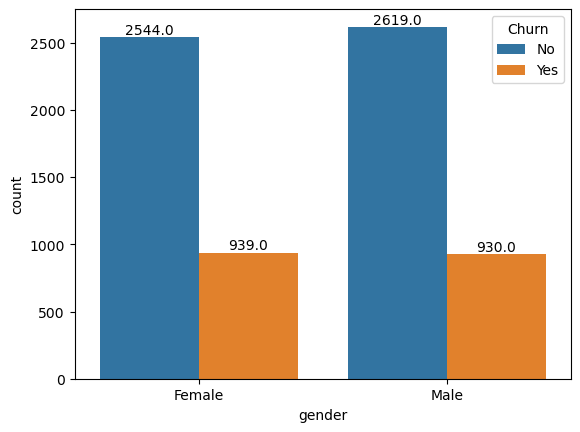

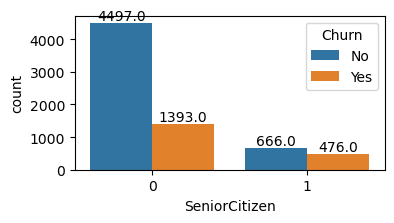

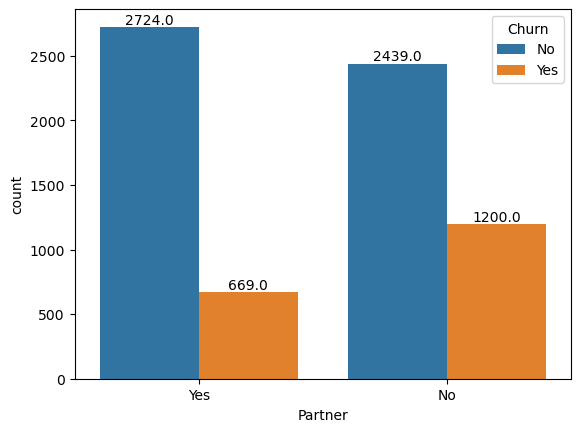

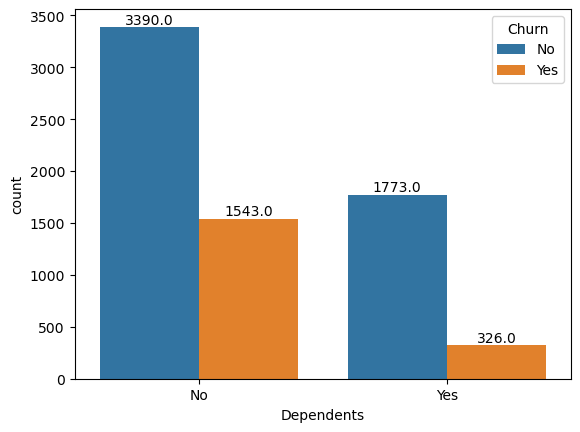

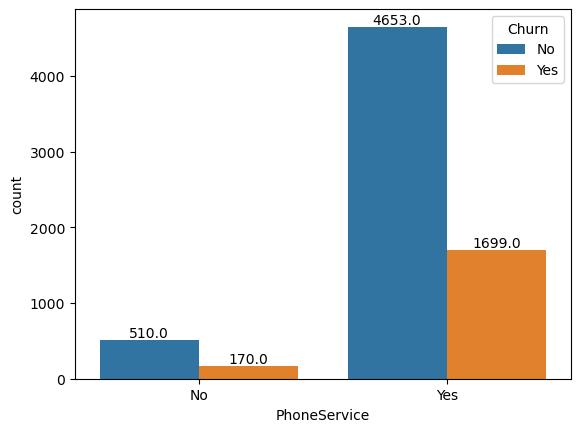

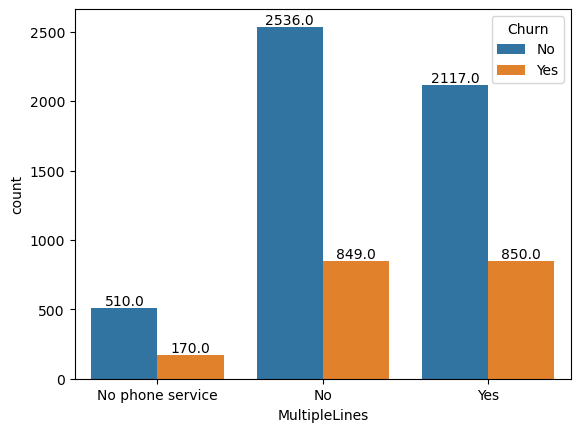

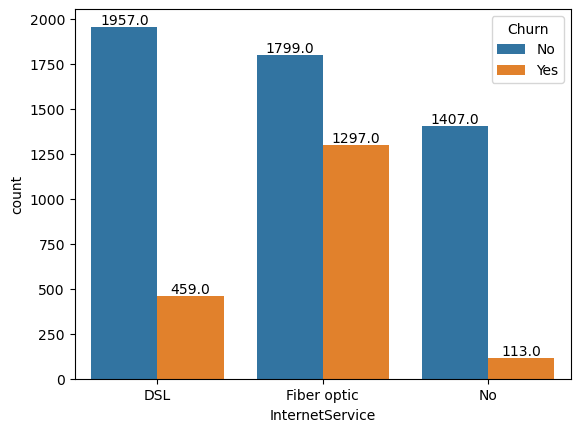

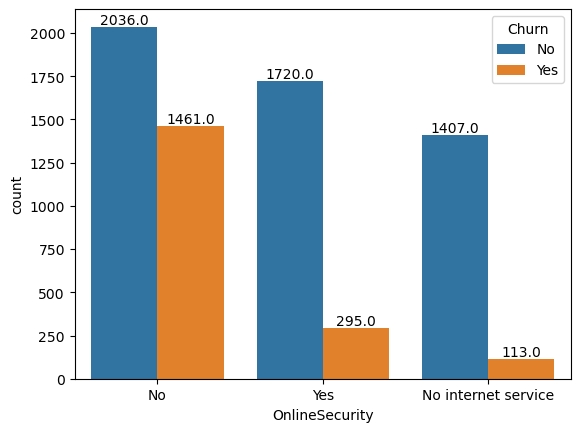

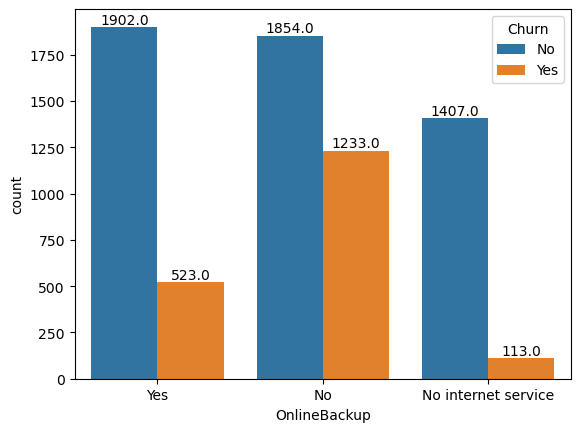

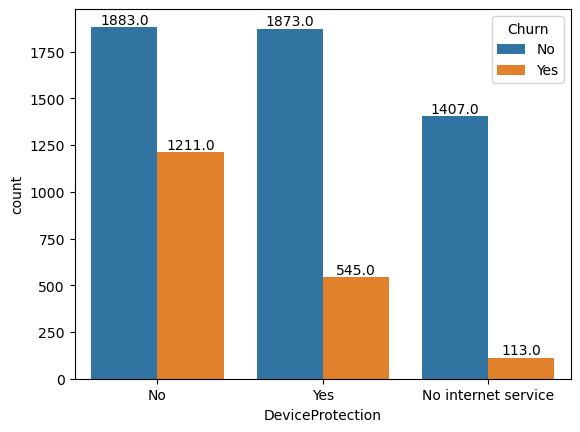

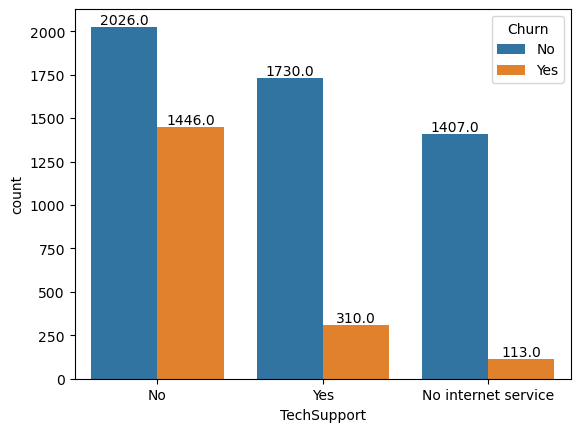

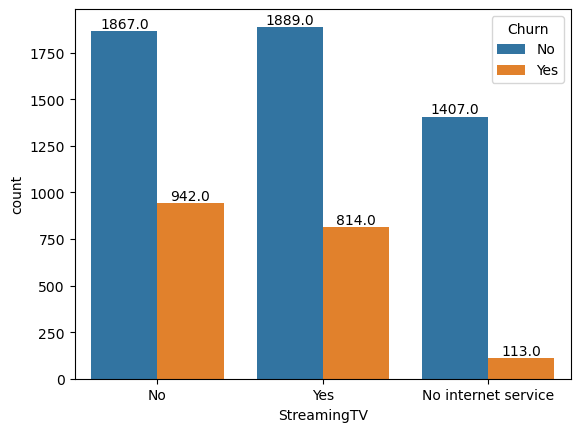

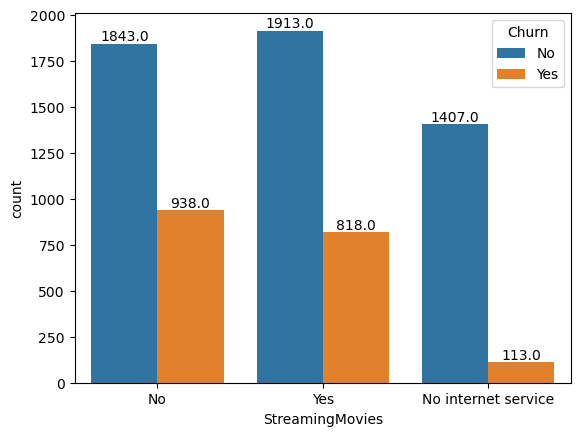

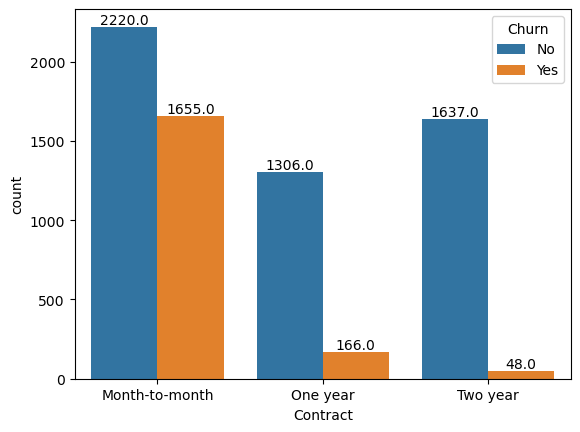

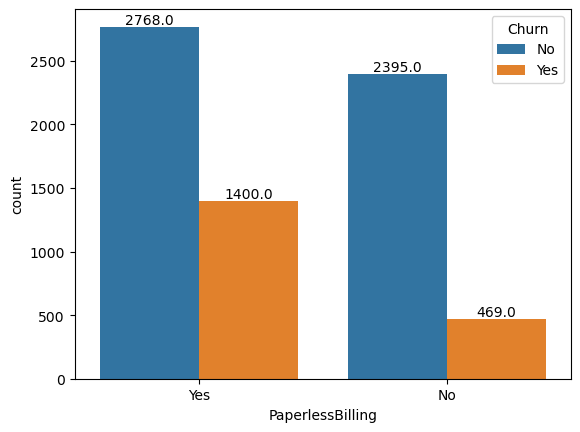

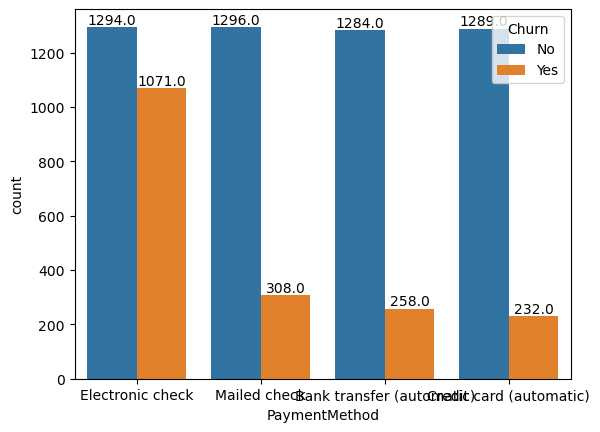

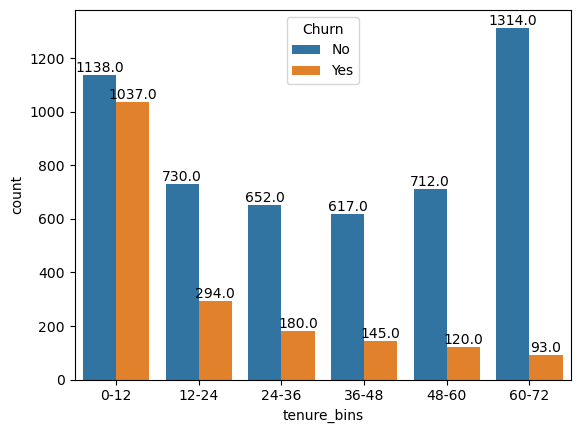

In [80]:
##Univariate Analysis

import seaborn as sns
import matplotlib.pyplot as plt

# Iterate over predictors and creating countplots
plt.figure(figsize=(4, 2))
for i, predictor in enumerate(new_df.drop(columns=['MonthlyCharges', 'TotalCharges', 'Churn'])):
    plt.figure(i)
    ax = sns.countplot(data=new_df, x=predictor, hue='Churn')

    # Addding numbers on top of the bars
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2, height + 0.1, height, ha='center', va='bottom')

# Show the plots
plt.show()


1. 41.68% of the Senior citizens have churned out which means they are one most significant group opting out of the services.
2. 33% of the churned customers have a partner indicating customers with partner are highly motivated to churn.
3. People with monthly customers are more likely to churn
4. Newly joined customers under 12 months are more likely to churn

Numerical Analysis

In [83]:
## Let's convert the categorical variables into dummies for numerical analysis
new_df_dummies=pd.get_dummies(new_df, dtype=int)
new_df_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes,tenure_bins_0-12,tenure_bins_12-24,tenure_bins_24-36,tenure_bins_36-48,tenure_bins_48-60,tenure_bins_60-72
0,0,29.85,29.85,1,0,0,1,1,0,1,...,1,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,1,1,0,1,0,0,...,0,1,1,0,0,0,1,0,0,0
2,0,53.85,108.15,0,1,1,0,1,0,0,...,0,1,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,1,1,0,1,0,1,...,0,0,1,0,0,0,0,1,0,0
4,0,70.70,151.65,1,0,1,0,1,0,0,...,1,0,0,1,1,0,0,0,0,0


C:\Users\nitis\AppData\Local\Temp\ipykernel_18112\114552757.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(new_df_dummies.MonthlyCharges[new_df_dummies["Churn_No"]==1],
C:\Users\nitis\AppData\Local\Temp\ipykernel_18112\114552757.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(new_df_dummies.MonthlyCharges[new_df_dummies["Churn_Yes"]==1],


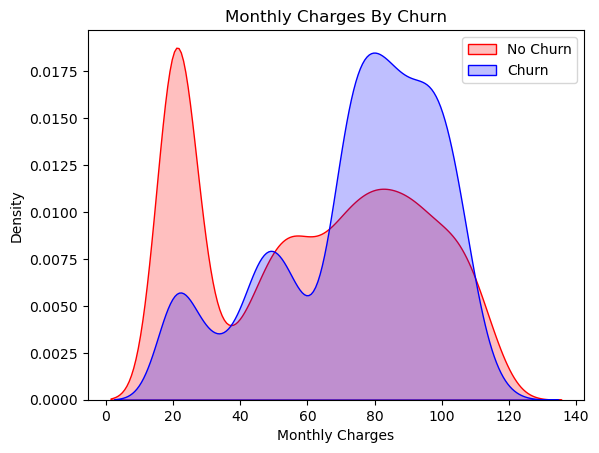

In [95]:
Mth = sns.kdeplot(new_df_dummies.MonthlyCharges[new_df_dummies["Churn_No"]==1],
                  color="Red", shade=True)
Mth = sns.kdeplot(new_df_dummies.MonthlyCharges[new_df_dummies["Churn_Yes"]==1],
                  ax=Mth, color="Blue", shade=True)
Mth.legend(["No Churn", "Churn"], loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly Charges By Churn')

plt.show()


Customers who monthly pays in the range of 60-120 are highly likely to churn

C:\Users\nitis\AppData\Local\Temp\ipykernel_18112\2861250383.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(new_df_dummies.TotalCharges[new_df_dummies["Churn_No"]==1],
C:\Users\nitis\AppData\Local\Temp\ipykernel_18112\2861250383.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(new_df_dummies.TotalCharges[new_df_dummies["Churn_Yes"]==1],


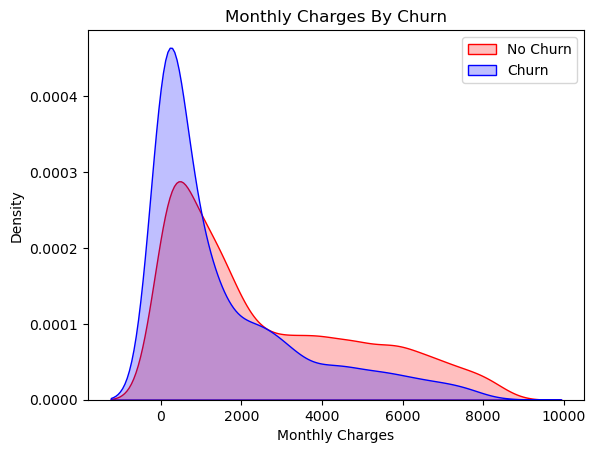

In [96]:
Mth = sns.kdeplot(new_df_dummies.TotalCharges[new_df_dummies["Churn_No"]==1],
                  color="Red", shade=True)
Mth = sns.kdeplot(new_df_dummies.TotalCharges[new_df_dummies["Churn_Yes"]==1],
                  ax=Mth, color="Blue", shade=True)
Mth.legend(["No Churn", "Churn"], loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly Charges By Churn')

plt.show()

The graph shows that customers who churned tend to pay lower monthly charges than customers who did not churn. This suggests that customers who are less satisfied with the service are more likely to cancel their subscriptions.


In [110]:
## now let's do some bivariate analysis. 
## lets divide our data in target 0 and target 1
new_df1_target_no = new_df[new_df["Churn"] == "No"]
new_df1_target_yes = new_df[new_df["Churn"] == "Yes"]


In [108]:
print(new_df["Churn"].unique())

['No' 'Yes']


In [111]:
len(new_df1_target_no)

5163

In [112]:
len(new_df1_target_yes)

1869

In [131]:
def uniplot(df, col, title, hue=None):
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 6
    plt.rcParams['axes.titlesize'] = 11
    plt.rcParams['axes.titlepad'] = 11
    
    temp = pd.Series(data=hue)
    fig, ax = plt.subplots(figsize=(6, 7))  
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index, hue=hue, palette='bright') 
    
    plt.show()

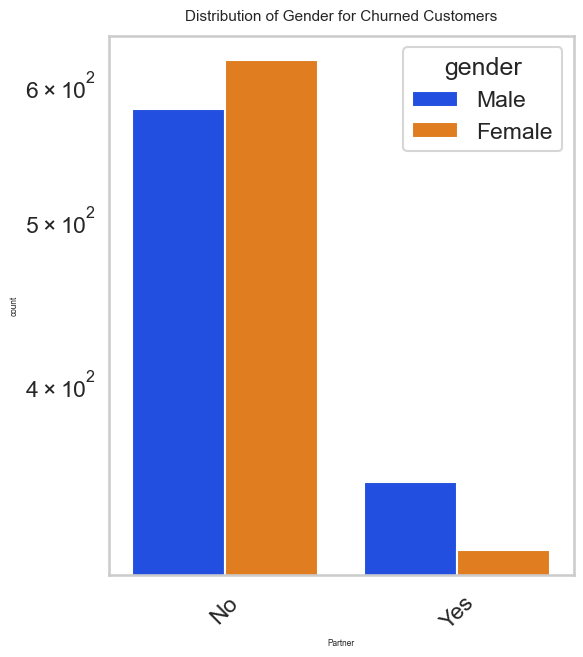

In [132]:
uniplot(new_df1_target_yes,col='Partner',title='Distribution of Gender for Churned Customers',hue='gender')

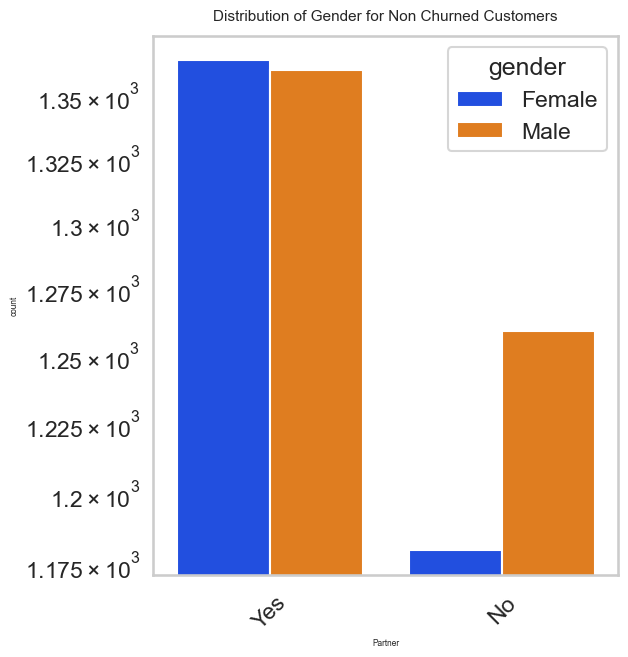

In [130]:
uniplot(new_df1_target_no,col='Partner',title='Distribution of Gender for Non Churned Customers',hue='gender')


Conclusion
